In [7]:
import numpy as np
import matplotlib.pylab as pl
import ot

In [8]:
n_source_samples = 40
n_target_samples = 40
theta = 2 * np.pi/20
noise_level = 0.05

Xs, ys = ot.datasets.make_data_classif('gaussrot', n_source_samples, nz=noise_level)
Xs_new, _ = ot.datasets.make_data_classif('gaussrot', n_source_samples, nz=noise_level)
Xt, yt = ot.datasets.make_data_classif('gaussrot', n_target_samples, theta=theta, nz=noise_level)

# one of the target mode changes its variance (no linear mapping)
Xt[yt == 2] *= 1
Xt = Xt + 2
#Xt = np.dot(Xt, np.array([[0.96592582628, 0.2588190451], [-0.2588190451, 0.96592582628]]))
Xt = np.dot(Xt, np.array([[0.86602540378, 0.5], [-0.5, 0.86602540378]]))

Text(0.5, 1.0, 'Source and target samples')

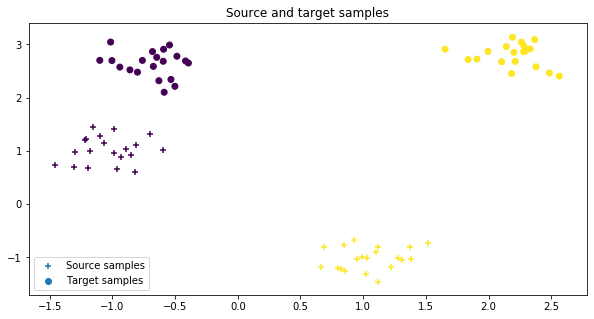

In [9]:
pl.figure(1, (10, 5))
pl.clf()
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target samples')

It.  |Loss        |Delta loss
--------------------------------
    0|4.233665e+03|0.000000e+00
    1|4.224100e+03|-2.259203e-03
    2|4.223627e+03|-1.121480e-04
    3|4.223474e+03|-3.613631e-05
    4|4.223384e+03|-2.125287e-05
    5|4.223323e+03|-1.444975e-05
    6|4.223319e+03|-9.937513e-07
It.  |Loss        |Delta loss
--------------------------------
    0|4.223286e+02|0.000000e+00
    1|4.206800e+02|-3.903600e-03
    2|4.205706e+02|-2.598721e-04
    3|4.205143e+02|-1.339012e-04
    4|4.204742e+02|-9.552063e-05
    5|4.204451e+02|-6.914346e-05
    6|4.204231e+02|-5.218793e-05
    7|4.204070e+02|-3.836732e-05
    8|4.203929e+02|-3.363694e-05
    9|4.203813e+02|-2.748094e-05
   10|4.203717e+02|-2.291356e-05


In [10]:
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=0.5, max_iter=50, verbose=True)

ot_sinkhorn.fit(Xs=Xs, Xt=Xt, ys=ys, yt=yt)
print(ot_sinkhorn.coupling_.shape)
transp_Xs_linear = ot_sinkhorn.transform(Xs=Xs)
print(Xs.shape)
print(Xt.shape)
print(transp_Xs_linear.shape)

It.  |Err         
-------------------
    0|4.525365e-02|
   10|3.625393e-15|
(40, 40)
(40, 2)
(40, 2)
(40, 2)


Text(0.5, 1.0, 'Transformed source and target samples')

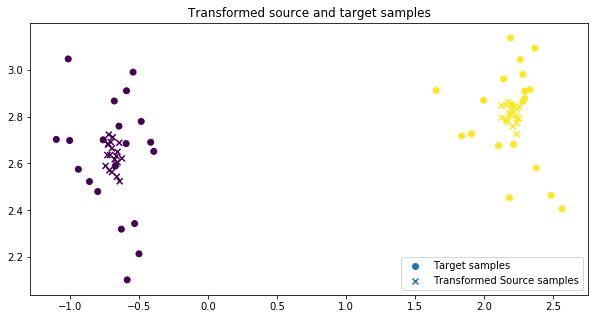

In [11]:
pl.figure(1, (10, 5))
pl.clf()

pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.scatter(transp_Xs_linear[:, 0], transp_Xs_linear[:, 1], c=yt, marker='x', label='Transformed Source samples')
pl.legend(loc=0)
pl.title('Transformed source and target samples')

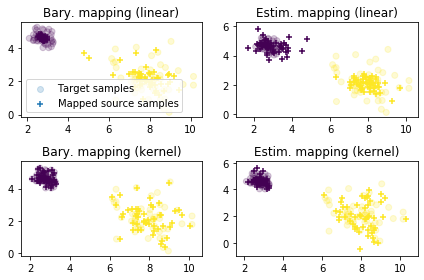

In [9]:
pl.figure(2)
pl.clf()
pl.subplot(2, 2, 1)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=.2)
pl.scatter(transp_Xs_linear[:, 0], transp_Xs_linear[:, 1], c=ys, marker='+',
           label='Mapped source samples')
pl.title("Bary. mapping (linear)")
pl.legend(loc=0)

pl.subplot(2, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=.2)
pl.scatter(transp_Xs_linear_new[:, 0], transp_Xs_linear_new[:, 1],
           c=ys, marker='+', label='Learned mapping')
pl.title("Estim. mapping (linear)")

pl.subplot(2, 2, 3)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=.2)
pl.scatter(transp_Xs_gaussian[:, 0], transp_Xs_gaussian[:, 1], c=ys,
           marker='+', label='barycentric mapping')
pl.title("Bary. mapping (kernel)")

pl.subplot(2, 2, 4)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=.2)
pl.scatter(transp_Xs_gaussian_new[:, 0], transp_Xs_gaussian_new[:, 1], c=ys,
           marker='+', label='Learned mapping')
pl.title("Estim. mapping (kernel)")
pl.tight_layout()

pl.show()